<a href="https://colab.research.google.com/github/henrique-esilva/resilia_modulo5_projetoEmGrupo/blob/main/projeto_em_grupo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOBRE O PROJETO

Esse é um projeto integrador, em que nós utilizamos
todas as ferramentas e conhecimentos trabalhados ao
longo do curso como Python e suas bibliotecas, estatística descritiva, MySQl, Power BI, Trello e metodologias ágeis como o Kanban.

Realizamos uma análise exploratória histórica dos valores de
criptomoedas.

As fontes de dados que serão utilizadas no projeto estão
disponíveis no site do Kaggle ou através do link: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory.

Criptomoedas são moedas digitais baseadas em criptografia, que
operam em uma rede blockchain que permite transações seguras e transparentes
sem a necessidade de intermediários, como bancos. Elas fazem parte do mundo
digital, afetam a economia atual e são consideradas altamente voláteis.

Por isso, eu e meu squad de dados da corretora Specter Investimentos fomos escalados para realizar uma análise exploratória relacionada à série histórica dos valores das 10 criptomoedas escolhidas pela empresa.

# Detalhes do projeto

A análise deverá responder às seguintes perguntas:
1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?
2. Quais os valores médios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valorizações?
4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
histórica?
6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série
histórica?
7. Existe correlação entre os valores para todas as criptomoedas?

O diretor da corretora nos pediu para incluir mais duas perguntas de insights que podemos tirar da análise para obtermos a seguinte conclusão

8.

9.

# IMPORTAÇÕES DAS BIBLIOTECAS

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#TRATAMENTO E EXIBIÇÃO DOS DADOS

In [105]:
#CRIANDO UM DATASET PARA CADA UMA DAS 10 CRIPTOMOEDAS QUE VAMOS ANALISAR
url1 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_BinanceCoin.csv'
url2 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Bitcoin.csv'
url3 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Dogecoin.csv'
url4 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Ethereum.csv'
url5 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Litecoin.csv'
url6 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Monero.csv'
url7 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Polkadot.csv'
url8 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Solana.csv'
url9 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_Stellar.csv'
url10 = 'https://raw.githubusercontent.com/Renandlt/modulo-5-gp/main/cripto_escolhidas/coin_XRP.csv'

Binance = pd.read_csv(url1)
Bitcoin = pd.read_csv(url2)
Dogecoin = pd.read_csv(url3)
Ethereum = pd.read_csv(url4)
Litecoin = pd.read_csv(url5)
Monero = pd.read_csv(url6)
Polkadot = pd.read_csv(url7)
Solana = pd.read_csv(url8)
Stellar = pd.read_csv(url9)
XRP = pd.read_csv(url10)

In [106]:
#COLOCANDO TODAS AS CRIPTOMOEDAS EM UMA LISTA PARA ACESSAR TODAS DE UMA VEZ USANDO O LAÇO DE REPETIÇÃO "FOR" PARA ANÁLISE
todas_as_cripto = [Bitcoin,Binance,Dogecoin,Ethereum,Litecoin,Monero,Polkadot,Solana,Stellar,XRP]
for cripto in todas_as_cripto:
  print(cripto)

       SNo     Name Symbol                 Date          High           Low  \
0        1  Bitcoin    BTC  2013-04-29 23:59:59    147.488007    134.000000   
1        2  Bitcoin    BTC  2013-04-30 23:59:59    146.929993    134.050003   
2        3  Bitcoin    BTC  2013-05-01 23:59:59    139.889999    107.720001   
3        4  Bitcoin    BTC  2013-05-02 23:59:59    125.599998     92.281898   
4        5  Bitcoin    BTC  2013-05-03 23:59:59    108.127998     79.099998   
...    ...      ...    ...                  ...           ...           ...   
2986  2987  Bitcoin    BTC  2021-07-02 23:59:59  33939.588699  32770.680780   
2987  2988  Bitcoin    BTC  2021-07-03 23:59:59  34909.259899  33402.696536   
2988  2989  Bitcoin    BTC  2021-07-04 23:59:59  35937.567147  34396.477458   
2989  2990  Bitcoin    BTC  2021-07-05 23:59:59  35284.344430  33213.661034   
2990  2991  Bitcoin    BTC  2021-07-06 23:59:59  35038.536363  33599.916169   

              Open         Close        Volume     

In [107]:
#RENOMEAR CADA ITEM DA LISTA "TODAS_AS_CRIPTO" AS COLUNAS DAS CRIPTOMOEDAS PARA PT-BR USANDO O LAÇO DE REPETIÇÃO "FOR" APENAS O QUE VAMOS USAR
for cripto in todas_as_cripto:
  cripto.rename(columns={'Name': 'Nome'}, inplace=True)
  cripto.rename(columns={'Date': 'Data'}, inplace=True)
  cripto.rename(columns={'High': 'Alta'}, inplace=True)
  cripto.rename(columns={'Low': 'Baixa'}, inplace=True)
  cripto.rename(columns={'Open': 'Aberto'}, inplace=True)
  cripto.rename(columns={'Close': 'Fechado'}, inplace=True)
  cripto.rename(columns={'Marketcap': 'Valor de Mercado'}, inplace=True)
todas_as_cripto

[       SNo     Nome Symbol                 Data          Alta         Baixa  \
 0        1  Bitcoin    BTC  2013-04-29 23:59:59    147.488007    134.000000   
 1        2  Bitcoin    BTC  2013-04-30 23:59:59    146.929993    134.050003   
 2        3  Bitcoin    BTC  2013-05-01 23:59:59    139.889999    107.720001   
 3        4  Bitcoin    BTC  2013-05-02 23:59:59    125.599998     92.281898   
 4        5  Bitcoin    BTC  2013-05-03 23:59:59    108.127998     79.099998   
 ...    ...      ...    ...                  ...           ...           ...   
 2986  2987  Bitcoin    BTC  2021-07-02 23:59:59  33939.588699  32770.680780   
 2987  2988  Bitcoin    BTC  2021-07-03 23:59:59  34909.259899  33402.696536   
 2988  2989  Bitcoin    BTC  2021-07-04 23:59:59  35937.567147  34396.477458   
 2989  2990  Bitcoin    BTC  2021-07-05 23:59:59  35284.344430  33213.661034   
 2990  2991  Bitcoin    BTC  2021-07-06 23:59:59  35038.536363  33599.916169   
 
             Aberto       Fechado     

In [108]:
for i in todas_as_cripto:
  i.insert(4, column='DiaSemana', value=None)

In [109]:
for i in todas_as_cripto:
  for j in range(len(i)):
    ano, mes, dia = i.loc[j, 'Data'].split(sep=' ')[0].split(sep='-')
    i.loc[j, 'DiaSemana'] = dt.date(int(ano), int(mes), int(dia)).weekday()

In [110]:
#CONCATENANDO TODAS AS CRIPTOMOEDAS
todas_as_cripto = pd.concat([Bitcoin, Ethereum, Monero, XRP, Dogecoin, Solana, Litecoin, Polkadot, Binance, Stellar])
todas_as_cripto

,SNo,Nome,Symbol,Data,DiaSemana,Alta,Baixa,Aberto,Fechado,Volume,Valor de Mercado
0,1,Bitcoin,BTC,2013-04-29 23:59:59,0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...,...
2522,2523,Stellar,XLM,2021-07-02 23:59:59,4,0.273359,0.252874,0.269148,0.263427,3.487793e+08,6.118631e+09
2523,2524,Stellar,XLM,2021-07-03 23:59:59,5,0.270331,0.259710,0.263304,0.264324,3.310069e+08,6.139464e+09
2524,2525,Stellar,XLM,2021-07-04 23:59:59,6,0.272314,0.259118,0.264254,0.268128,3.376196e+08,6.227819e+09
2525,2526,Stellar,XLM,2021-07-05 23:59:59,0,0.268272,0.252300,0.268272,0.254456,3.359242e+08,5.910264e+09


In [111]:
#REMOVER AS COLUNAS QUE NÃO VAMOS USAR "SNo" E "Symbol"
todas_as_cripto = todas_as_cripto.drop('SNo', axis=1)
todas_as_cripto = todas_as_cripto.drop('Symbol', axis=1)
todas_as_cripto

,Nome,Data,DiaSemana,Alta,Baixa,Aberto,Fechado,Volume,Valor de Mercado
0,Bitcoin,2013-04-29 23:59:59,0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,Bitcoin,2013-04-30 23:59:59,1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,Bitcoin,2013-05-01 23:59:59,2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,Bitcoin,2013-05-02 23:59:59,3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,Bitcoin,2013-05-03 23:59:59,4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...
2522,Stellar,2021-07-02 23:59:59,4,0.273359,0.252874,0.269148,0.263427,3.487793e+08,6.118631e+09
2523,Stellar,2021-07-03 23:59:59,5,0.270331,0.259710,0.263304,0.264324,3.310069e+08,6.139464e+09
2524,Stellar,2021-07-04 23:59:59,6,0.272314,0.259118,0.264254,0.268128,3.376196e+08,6.227819e+09
2525,Stellar,2021-07-05 23:59:59,0,0.268272,0.252300,0.268272,0.254456,3.359242e+08,5.910264e+09


In [112]:
#ALTERAR A ORDEM DA DATA EM UM FORMATO AMERICANO PARA QUE O MYSQL POSSA ENTENDER
todas_as_cripto['Data'] = pd.to_datetime(todas_as_cripto['Data']).dt.strftime('%Y-%m-%d')
todas_as_cripto

,Nome,Data,DiaSemana,Alta,Baixa,Aberto,Fechado,Volume,Valor de Mercado
0,Bitcoin,2013-04-29,0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,Bitcoin,2013-04-30,1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,Bitcoin,2013-05-01,2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,Bitcoin,2013-05-02,3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,Bitcoin,2013-05-03,4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...
2522,Stellar,2021-07-02,4,0.273359,0.252874,0.269148,0.263427,3.487793e+08,6.118631e+09
2523,Stellar,2021-07-03,5,0.270331,0.259710,0.263304,0.264324,3.310069e+08,6.139464e+09
2524,Stellar,2021-07-04,6,0.272314,0.259118,0.264254,0.268128,3.376196e+08,6.227819e+09
2525,Stellar,2021-07-05,0,0.268272,0.252300,0.268272,0.254456,3.359242e+08,5.910264e+09


In [113]:
#CRIANDO UM FILTRO PARA CADA CRIPTOMOEDA DA DATA 2013/07/26 ATÉ 2021/01/01
criptos_formatadas = {}
for nome, df in todas_as_cripto.groupby('Nome'):
    df['Data'] = pd.to_datetime(df['Data'])
    filtro = (df['Data'] > '2013-07-26') & (df['Data'] < '2021-01-01')
    criptos_formatadas[nome] = df.loc[filtro]

# Convertendo o dicionário para uma lista de DataFrames
lista_criptos_formatadas = list(criptos_formatadas.values())

# Concatenando a lista de DataFrames em um único DataFrame
resultado_cripto = pd.concat(lista_criptos_formatadas)

# Salvando o DataFrame final em um arquivo CSV
resultado_cripto.to_csv('hall_of_cripto.csv', sep= ';', index=False)

In [114]:
#ORDENAR OS DADOS DA COLUNA DATA EM ORDEM CRESCENTE E MOSTRAR OS 10 PRIMEIROS
resultado_cripto = resultado_cripto.sort_values('Data')
resultado_cripto.head(10)

,Nome,Data,DiaSemana,Alta,Baixa,Aberto,Fechado,Volume,Valor de Mercado
89,Litecoin,2013-07-27,5,2.935070,2.836720,2.896930,2.879950,0.0,5.706961e+07
89,Bitcoin,2013-07-27,5,96.995003,93.000000,96.020103,94.115997,0.0,1.079492e+09
90,Litecoin,2013-07-28,6,3.026130,2.840690,2.884860,2.977790,0.0,5.909180e+07
90,Bitcoin,2013-07-28,6,100.577003,94.000000,94.400002,99.755997,0.0,1.144603e+09
91,Litecoin,2013-07-29,0,3.040700,2.942500,2.943280,2.963140,0.0,5.888198e+07
91,Bitcoin,2013-07-29,0,102.500000,98.455002,98.599998,101.199997,0.0,1.161619e+09
92,Bitcoin,2013-07-30,1,107.989998,100.470001,101.488998,107.989998,0.0,1.240092e+09
92,Litecoin,2013-07-30,1,2.995830,2.883800,2.972610,2.985920,0.0,5.941811e+07
93,Bitcoin,2013-07-31,2,111.344002,103.879997,107.949997,106.089996,0.0,1.218778e+09
93,Litecoin,2013-07-31,2,3.027720,2.843040,3.001010,2.868680,0.0,5.715638e+07


# ANÁLISE EXPLORATÓRIA

## ESTATÍSTICA DESCRITIVA

Aqui faremos uma análise estatística padrão com métricas para cada coluna da tabela

In [11]:
#Calculando a média, moda, mediana, variância e o desvio padrão das colunas
colunas_escolhidas = ['Aberto', 'Fechado', 'Volume', 'Alta', 'Baixa', 'Valor de Mercado']
print('==== Estatística geral das criptomoedas ====')
for i in colunas_escolhidas:
  print(f'\n\n-----Média, moda, mediana, variância e o desvio padrão da coluna {i}-----')
  print(resultado_cripto[i].agg(['mean', lambda x: x.mode().iloc[0], 'median', 'var', 'std']))

==== Estatística geral das criptomoedas ====


-----Média, moda, mediana, variância e o desvio padrão da coluna Aberto-----
mean        6.410260e+02
<lambda>    1.295800e-04
median      3.543645e+00
var         5.306886e+06
std         2.303668e+03
Name: Aberto, dtype: float64


-----Média, moda, mediana, variância e o desvio padrão da coluna Fechado-----
mean        6.425766e+02
<lambda>    2.080500e-04
median      3.556995e+00
var         5.348965e+06
std         2.312783e+03
Name: Fechado, dtype: float64


-----Média, moda, mediana, variância e o desvio padrão da coluna Volume-----
mean        1.882748e+09
<lambda>    0.000000e+00
median      4.640139e+07
var         3.461740e+19
std         5.883655e+09
Name: Volume, dtype: float64


-----Média, moda, mediana, variância e o desvio padrão da coluna Alta-----
mean        6.578619e+02
<lambda>    1.080000e+02
median      3.637050e+00
var         5.604133e+06
std         2.367305e+03
Name: Alta, dtype: float64


-----Média, moda, media

Aqui será calculada a média dos valores de cada criptomoeda a partir da data do ativo mais recentemente criado.

In [12]:
print('= registro mais antigo de cada criptoativo =\n')
for name in todas_as_cripto['Nome'].unique():
  print("%13s: %s"%(name, todas_as_cripto[todas_as_cripto['Nome']==name]['Data'].min()))

= registro mais antigo de cada criptoativo =

      Bitcoin: 2013-04-29
     Ethereum: 2015-08-08
       Monero: 2014-05-22
          XRP: 2013-08-05
     Dogecoin: 2013-12-16
       Solana: 2020-04-11
     Litecoin: 2013-04-29
     Polkadot: 2020-08-21
 Binance Coin: 2017-07-26
      Stellar: 2014-08-06


A criptomoeda mais recente é a Polkadot, com início dos registro em 21 de Agosto de 2020

In [13]:
# uma cópia dos registros a partir de 21-08-2020
registros_comuns = todas_as_cripto[todas_as_cripto['Data']>="2020-08-21"]
#registros_comuns

In [14]:
print('média de fechamento por critpomeda a partir de 21 de Agosto de 2020')
registros_comuns.groupby('Nome').Fechado.mean()

média de fechamento por critpomeda a partir de 21 de Agosto de 2020


Nome
Binance Coin      186.158876
Bitcoin         32851.039150
Dogecoin            0.106152
Ethereum         1404.402323
Litecoin          142.920740
Monero            194.629651
Polkadot           18.143080
Solana             14.353778
Stellar             0.282526
XRP                 0.583474
Name: Fechado, dtype: float64

Ao observar estas médias do fechamento **a partir de 21 de Agosto de 2020**, observe que, ao início do período observado, algumas criptomoedas mais antigas já estavam com uma cotação elevada.

In [39]:
# acessando os primeiros 320 registros de cada criptomoeda
print('Média de fechamento dos primeiros 320 registros de cada criptomoeda')
for i in [Bitcoin,Binance,Dogecoin,Ethereum,Litecoin,Monero,Polkadot,Solana,Stellar,XRP]:
  print('%12s: %18s: %10.6f'%(i.loc[0].Nome, i.loc[0].Data, i.loc[:320]['Fechado'].mean()))

     Bitcoin: 2013-04-29 23:59:59: 367.239613
Binance Coin: 2017-07-26 23:59:59:   7.276831
    Dogecoin: 2013-12-16 23:59:59:   0.000508
    Ethereum: 2015-08-08 23:59:59:   5.039624
    Litecoin: 2013-04-29 23:59:59:   9.685248
      Monero: 2014-05-22 23:59:59:   1.224659
    Polkadot: 2020-08-21 23:59:59:  18.143080
      Solana: 2020-04-11 23:59:59:   2.434652
     Stellar: 2014-08-06 23:59:59:   0.003070
         XRP: 2013-08-05 23:59:59:   0.012640


## SÉRIE HISTÓRICA DO VALOR DE MERCADO

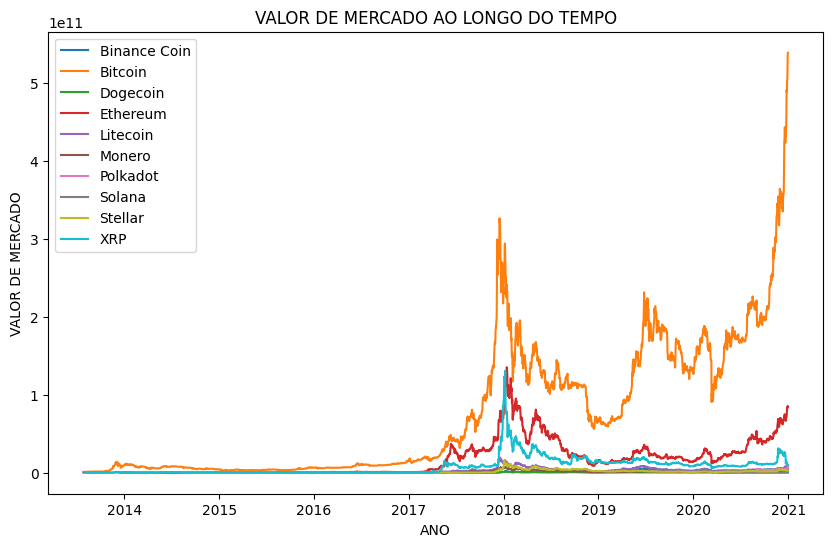

In [ ]:
# Agrupando por nome
nomes = resultado_cripto.groupby('Nome')

plt.figure(figsize=(10, 6))

# Iterar sobre cada grupo e plotar o gráfico de linha para 'Valor de Mercado'
for nome, grupo in nomes:
    # Plotar gráfico de linha para 'Valor de Mercado'
    plt.plot(grupo['Data'], grupo['Valor de Mercado'], label=nome)

# Adicionar título ao gráfico
plt.title('VALOR DE MERCADO AO LONGO DO TEMPO')
plt.xlabel('ANO')
plt.ylabel('VALOR DE MERCADO')
plt.legend()
plt.show()

No gráfico acima é possível observar a performance de várias criptomoedas desde 2013 até 2021.

Através do gráfico, podemos observar os preços das criptomoedas apresentando flutuações significativas, o que mostra a volatilidade do mercado de criptomoedas.

## CORRELAÇÃO DE VALORES

In [ ]:
#CALCULO DE CORRELAÇÃO
correlacao_todas_as_cripto = todas_as_cripto[['Volume', 'Valor de Mercado']]
correlacao_todas_as_cripto.corr()

,Volume,Valor de Mercado
Volume,1.000000,0.816492
Valor de Mercado,0.816492,1.000000


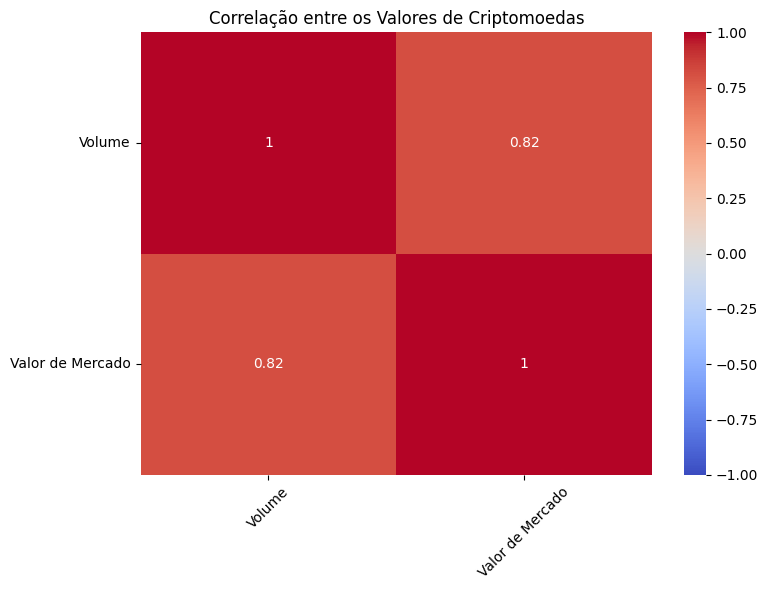

In [ ]:
#MAPA DE CALOR GRÁFICO DE CORRELAÇÃO
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_todas_as_cripto.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre os Valores de Criptomoedas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
cripto_separadas = [Bitcoin, Ethereum, Monero, XRP, Dogecoin, Solana, Litecoin, Polkadot, Binance, Stellar]
cripto_separadas_forma = ['Bitcoin', 'Ethereum', 'Monero', 'XRP', 'Dogecoin', 'Solana', 'Litecoin', 'Polkadot', 'Binance', 'Stellar']

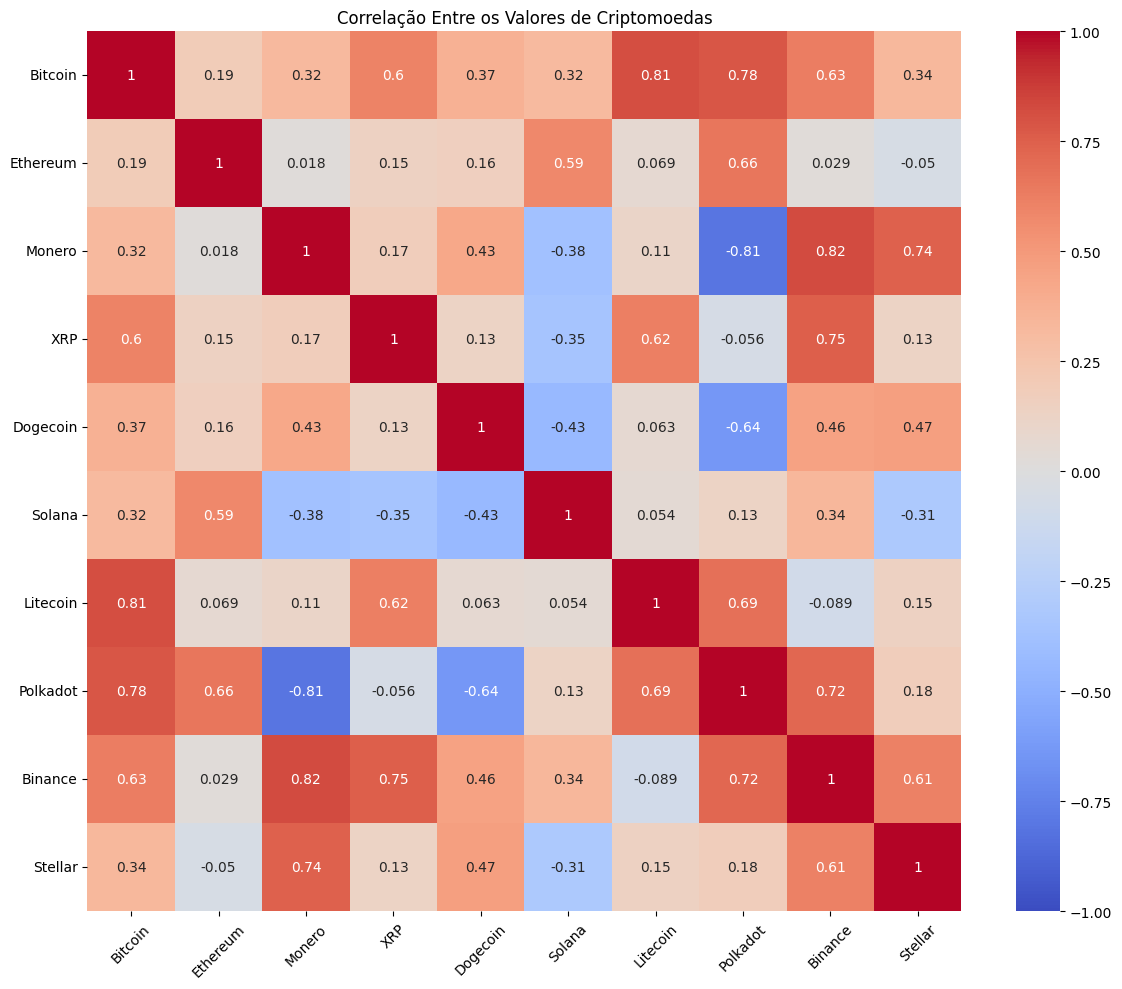

In [ ]:
# Criar um novo DataFrame para armazenar as informações de 'close' e nome da moeda
cripto_dataframe = pd.DataFrame()


for i, moeda_df in enumerate(cripto_separadas):
    nome_moeda = f'Moeda_{i+1}'
    close_column = moeda_df['Fechado']
    cripto_dataframe[nome_moeda] = close_column

correlacao_matrix = cripto_dataframe.corr()

correlacao_matrix.columns = cripto_separadas_forma
correlacao_matrix.index = cripto_separadas_forma


# Configurando o mapa de calor:
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Configurando os eixos:
plt.title('Correlação Entre os Valores de Criptomoedas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()

# CONCLUSÕES

## 1. Como se comportaram os valores para todas as criptomoedas e qual a tendência dos valores de mercado?

Como pode ser visto no gráfico de série histórica, as criptomoedas observadas apresentam, no geral, tendência de alta. Elas também possuem grande volatilidade, se encaixando como ativos de considerável risco.

## 2. Quais os valores médios para todas as criptomoedas?

Bem, vamos responder essa pergunta de três maneiras.
Primeiro, tiraremos a média do valor de cada criptoativo em todos os registros  

In [50]:
print(todas_as_cripto.groupby('Nome').Fechado.mean())

Nome
Binance Coin      52.250308
Bitcoin         6711.290443
Dogecoin           0.013763
Ethereum         383.910691
Litecoin          49.279008
Monero            74.134773
Polkadot          18.143080
Solana            10.471388
Stellar            0.101509
XRP                0.234790
Name: Fechado, dtype: float64


Como temos moedas mais antigas que outras, o período analisado será diferente. Portanto vamos calcular agora apenas no período em que todas as criptomoedas estão presentes

In [51]:
print('= registro mais antigo de cada criptoativo =\n')
for name in todas_as_cripto['Nome'].unique():
  print("%13s: %s"%(name, todas_as_cripto[todas_as_cripto['Nome']==name]['Data'].min()))

= registro mais antigo de cada criptoativo =

      Bitcoin: 2013-04-29
     Ethereum: 2015-08-08
       Monero: 2014-05-22
          XRP: 2013-08-05
     Dogecoin: 2013-12-16
       Solana: 2020-04-11
     Litecoin: 2013-04-29
     Polkadot: 2020-08-21
 Binance Coin: 2017-07-26
      Stellar: 2014-08-06


A criptomoeda mais recente é a Polkadot, com início dos registro em 21 de Agosto de 2020
Vamos calcular apenas nesse período a média de todas as criptomoedas

In [52]:
print('Média de fechamento por critpomeda (21 de Agosto de 2020 até o final)')
print(registros_comuns.groupby('Nome').Fechado.mean())

Média de fechamento por critpomeda (21 de Agosto de 2020 até o final)
Nome
Binance Coin      186.158876
Bitcoin         32851.039150
Dogecoin            0.106152
Ethereum         1404.402323
Litecoin          142.920740
Monero            194.629651
Polkadot           18.143080
Solana             14.353778
Stellar             0.282526
XRP                 0.583474
Name: Fechado, dtype: float64


Este período em que todas as criptomoedas estão presentes é de 320 dias. Portanto, vamos calcular a média do valor ao fim do dia dos PRIMEIROS 320 dias de cada criptomoeda desde seu registro mais antigo

In [54]:
print('\nMédia de fechamento dos primeiros 320 registros de cada criptomoeda')
for i in [Bitcoin,Binance,Dogecoin,Ethereum,Litecoin,Monero,Polkadot,Solana,Stellar,XRP]:
  print('%12s: %10.6f'%(i.loc[0].Nome, i.loc[:320]['Fechado'].mean()))


Média de fechamento dos primeiros 320 registros de cada criptomoeda
     Bitcoin: 367.239613
Binance Coin:   7.276831
    Dogecoin:   0.000508
    Ethereum:   5.039624
    Litecoin:   9.685248
      Monero:   1.224659
    Polkadot:  18.143080
      Solana:   2.434652
     Stellar:   0.003070
         XRP:   0.012640


## 3. Em quais anos houve maiores quedas e valorizações?

## 4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

In [ ]:
# criar um heatmap que relacione as colunas DiaSemana e Valor de Mercado

## 5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

## 6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

## 7. Existe correlação entre os valores para todas as criptomoedas?